# Central Tendency (Mean & Median)

Analysis perfomed to find the average(mean) and median(mid value) price of Airbnb by each neighbourhood group. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

from pathlib import Path

In [2]:
filepath = Path("Resources/cleaned_airbnb_data.csv")
clean_df = pd.read_csv(filepath, low_memory=False)
clean_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN


In [3]:
clean_df['id'].nunique()

82106

In [4]:
clean_df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                     bool
cancellation_policy                object
room type                          object
Construction year                 float64
price                               int64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [5]:
clean_df['neighbourhood group'].value_counts()

neighbourhood group
Brooklyn         34049
Manhattan        33917
Queens           11058
Bronx             2267
Staten Island      815
Name: count, dtype: int64

In [6]:
clean_df['price_with_currency'] = '$' + clean_df['price'].astype(str)
clean_df['price_with_currency']


0         $966
1         $142
2         $368
3         $204
4        $1060
         ...  
82101     $946
82102     $706
82103    $1043
82104     $809
82105    $1128
Name: price_with_currency, Length: 82106, dtype: object

In [7]:
cleaned_df = clean_df.groupby(["neighbourhood group"])
cleaned_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_with_currency
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,$966
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,$142
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN,$368
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,$204
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN,$1060
5,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN,$1018
6,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,...,1.0,160.0,2019-06-09,1.33,3.0,4.0,1.0,NaN,NaN,$319
7,1007411,Beautiful 1br on Upper West Side,18824631834,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,United States,...,5.0,53.0,2019-06-22,0.43,4.0,1.0,163.0,"My ideal guests would be warm, friendly, and r...",NaN,$606
9,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,Brooklyn,South Slope,40.66829,-73.98779,United States,...,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN,$580
12,1022323,Cute apt in artist's home,88653822946,verified,Joyce,Brooklyn,Bushwick,40.70186,-73.92745,United States,...,2.0,231.0,2019-06-22,1.96,3.0,2.0,214.0,Please no shoes inside the house and no smoki...,NaN,$1097


In [8]:
#Mean,Median,Min & Max for neighbourhood group by city
group_df = clean_df.groupby('neighbourhood group').agg({
    'price': ['mean','median','min','max'],
}).reset_index()
group_df.head()

neighbourhood group       price                 
                             mean median min   max
0               Bronx  630.534627  643.0  50  1200
1            Brooklyn  627.654762  627.0  50  1200
2           Manhattan  624.346316  624.0  50  1200
3              Queens  630.139808  630.0  50  1200
4       Staten Island  623.234356  625.0  50  1200

In [9]:
#Mean,Median for neighbourhood group by city
hood_df = clean_df.groupby('neighbourhood group').agg({
    'price': ['mean','median'],
}).reset_index()
hood_df.head()

neighbourhood group       price       
                             mean median
0               Bronx  630.534627  643.0
1            Brooklyn  627.654762  627.0
2           Manhattan  624.346316  624.0
3              Queens  630.139808  630.0
4       Staten Island  623.234356  625.0

In [10]:
#sample pie chart to display only Mean of neighbourhood group
pies = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
pie_votes = ["630.534627", "627.654762", "624.346316", "630.139808", "623.234356"]
colors = ["yellow","green","lightblue","orange","lightpink"]
explode = (0.1,0,0,0,0)

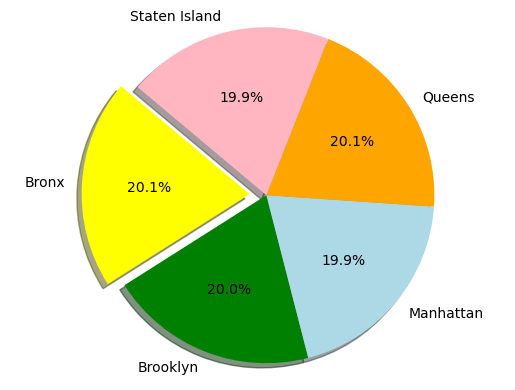

In [11]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()

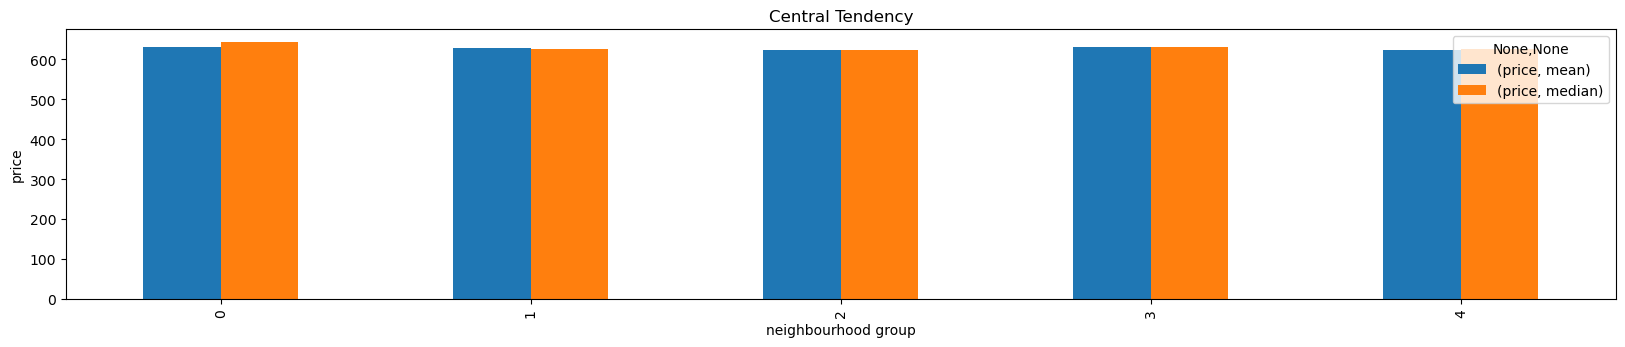

<Figure size 640x480 with 0 Axes>

In [12]:
# Use DataFrame.plot() in order to create a bar chart of the data
hood_df.plot(kind="bar", figsize=(20,3.5))

# Set a title for the chart
plt.title("Central Tendency")
plt.xlabel("neighbourhood group")
plt.ylabel("price")

plt.savefig("Resources/centraltendency.png")

plt.show()
plt.tight_layout()

In [13]:
#check the best measure of central tendency by determining if prices are normally distributed → use scipy.stats..normaltest
Bronx = clean_df.loc[clean_df["neighbourhood group"] == "Bronx", :]
print(Bronx)

             id                                               NAME  \
76      1172549               Condo Apartment with laundry in unit   
120     1241034  Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...   
176     1309519         Yankee Stadium Oasis 2 stops to Manhattan!   
197     1338791     Zen Yankee Stadium Pad 5 Minutes To Manhattan!   
222     1358122                  NY/ Big Room for 2 near Manhattan   
...         ...                                                ...   
81838  57186815   Superhost HUGE Room+Private Bath -Yankee Stadium   
81919  57237074     Partitioned (shared) Cozy Studio in Pelham Bay   
81978  57279049    Large Room with Private Bathroom (Long Term+++)   
82000  57293961                      Clean and renovated apartment   
82034  57315501       Comfy & Spacious RM with Backyard/Near Metro   

           host id host_identity_verified  host name neighbourhood group  \
76     67156618342               verified    Douglas               Bronx   
120    

In [14]:
print(st.normaltest(Bronx['price'].sample(50)))

NormaltestResult(statistic=17.100078906111264, pvalue=0.0001935374637631425)


In [15]:
Brooklyn = clean_df.loc[clean_df["neighbourhood group"] == "Brooklyn", :]
print(Brooklyn) 

             id                                             NAME      host id  \
0       1001254               Clean & quiet apt home by the park  80014485718   
2       1002755                                              NaN  85098326012   
4       1005202                                  BlissArtsSpace!  90821839709   
9       1008516   Lovely Room 1, Garden, Best Area, Legal rental  26802410424   
12      1022323                        Cute apt in artist's home  88653822946   
...         ...                                              ...          ...   
82093  57352505                     An East Williamsburg Delight  71564706996   
82094  57353057                     Cozy bedroom in williamsburg  83101851929   
82097  57355819          Private Room in Brooklyn Communal House  39435056937   
82098  57356923                  HUGE BEDROOM LORIMER L TRAIN!!!  29320426760   
82104  57360237  Lovely Two Bedroom & Event Space From Nonprofit  83006936257   

      host_identity_verifie

In [16]:
print(st.normaltest(Brooklyn['price'].sample(50)))

NormaltestResult(statistic=5.943752207580906, pvalue=0.05120715022831513)


In [17]:
Manhattan = clean_df.loc[clean_df["neighbourhood group"] == "Manhattan", :]
print(Manhattan) 

             id                                               NAME  \
1       1002102                              Skylit Midtown Castle   
3       1003689   Entire Apt: Spacious Studio/Loft by central park   
5       1005754                    Large Furnished Room Near B'way   
6       1006859                 Cute & Cozy Lower East Side 1 bdrm   
7       1007411                   Beautiful 1br on Upper West Side   
...         ...                                                ...   
82089  57349744       COZY Large Private APARTMENT in EAST VILLAGE   
82099  57357476     Spacious two bedrooms condo in upper Manhattan   
82102  57359133       Central Park Views - Private Room & Bathroom   
82103  57359685  Ultimate 50th Floor Downtown Penthouse  - 4000...   
82105  57367417                                    Rosalee Stewart   

           host id host_identity_verified host name neighbourhood group  \
1      52335172823               verified     Jenna           Manhattan   
3      92

In [18]:
print(st.normaltest(Manhattan['price'].sample(50)))

NormaltestResult(statistic=4.344360174552804, pvalue=0.1139289708744694)


In [19]:
Queens = clean_df.loc[clean_df["neighbourhood group"] == "Queens", :]
print(Queens) 

             id                                              NAME  \
41      1101855                Beautiful Queens Brownstone! - 5BR   
54      1128365                 Nice, clean, safe, convenient 3BR   
83      1176415               One Bedroom Mini studio - Free WIFI   
95      1204582                  Oceanfront Apartment in Rockaway   
122     1242139                         Astoria-Private Home NYC-   
...         ...                                               ...   
82092  57351953            Cozy room in a 2B with backyard access   
82095  57353610                            Spacious Room w/ 2 Bed   
82096  57354162  Artsy Private Room in LIC. 2 min walk to Subway.   
82100  57358028                     Room in Queens, NY, near LGA.   
82101  57358580                          Cozy home away from home   

           host id host_identity_verified  host name neighbourhood group  \
41     65716686884            unconfirmed       Brad              Queens   
54     41153188173 

In [20]:
print(st.normaltest(Queens['price'].sample(50)))

NormaltestResult(statistic=16.216366994611224, pvalue=0.00030106526264292715)


In [21]:
Staten_Island = clean_df.loc[clean_df["neighbourhood group"] == "Staten Island", :]
print(Staten_Island) 

             id                                               NAME  \
186     1317252                 New Clean Spacious Bed & Breakfast   
245     1390708                   Budget stay, near transportation   
350     1480180       Private Room in Artist's Home, Stapleton, SI   
417     1530439                    Enjoy Staten Island Hospitality   
766     1788364    Beautiful 4BR/4BA Home, Staten Island, NY City.   
...         ...                                                ...   
81625  57049845   Lovely, private studio apartment near Manhattan.   
81762  57137108  Contemporary. Spacious Apartment. Close to Ferry.   
81855  57197309  @Ferry,HUGE 2Br/3beds. Private,Renovated/Styli...   
81920  57237627                      Cherry Hill House - Blue Room   
82011  57300037                              The Sweet Pea Cottage   

           host id host_identity_verified   host name neighbourhood group  \
186    72246290898            unconfirmed         Max       Staten Island   
245  

In [22]:
print(st.normaltest(Staten_Island['price'].sample(50)))

NormaltestResult(statistic=7.591509646610265, pvalue=0.02246594159875695)


In [23]:
#st.normaltest for all neighbourhood group - QUESTION????
print(st.normaltest(clean_df['price'].sample(1000)))

NormaltestResult(statistic=737.6711420283159, pvalue=6.557628037253997e-161)


In [24]:
#Count by price range (Groups ranging from min$50 - max$1200, $200 increments?: <200, 200-399, 400-599, 600-799, 800-999, 1000+) (Bar?)
#Repeat within each neighborhood group?
#Create bins/labels in which to place price with increment of $200
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
group_labels = ["0-99", "100-199", "200-299","300-399","400-499", "500-599", "600-699","700-799", "800-899", "900-999", "1000-1099", "1100-1200"]

# Slice the data and place it into bins
bins_df = clean_df
bins_df["count price range"] = pd.cut(clean_df["price"], 
                                              bins, labels=group_labels, include_lowest=True)

bins_df["count price range"].head()

0      900-999
1      100-199
2      300-399
3      200-299
4    1000-1099
Name: count price range, dtype: category
Categories (12, object): ['0-99' < '100-199' < '200-299' < '300-399' ... '800-899' < '900-999' < '1000-1099' < '1100-1200']

In [25]:
price_range = bins_df.groupby(["count price range"])
price_range

In [26]:
price_range["price"].count()

count price range
0-99         3505
100-199      7044
200-299      7121
300-399      6998
400-499      7321
500-599      7221
600-699      7247
700-799      7096
800-899      6975
900-999      7207
1000-1099    7148
1100-1200    7223
Name: price, dtype: int64

<BarContainer object of 12 artists>

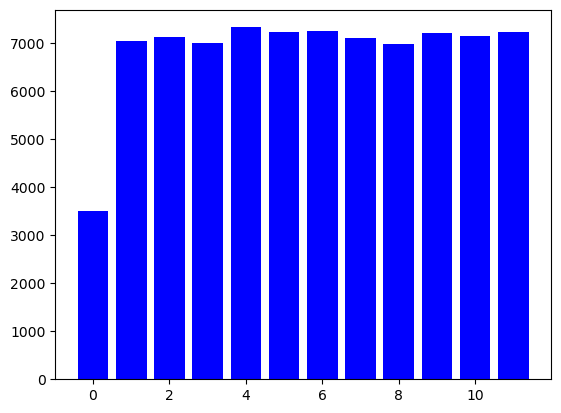

In [27]:
## Create a bar chart based upon the above data
neighbourhood_properties = [3505,7044,7121,6998,7321,7221,7247,7096,6975,7207,7148,7223]
x_axis = np.arange(len(neighbourhood_properties))
plt.bar(x_axis, neighbourhood_properties, color="b", align="center")